[1 0 0 0]


C:\Users\Forry\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.7726, ||grad|| = 1: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 752.36it/s]


1


Sequential sampling (2 chains in 1 job)
Metropolis: [theta]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 6365.19it/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 6000/6000 [00:10<00:00, 583.74draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225E31880F0>,
      dtype=object)

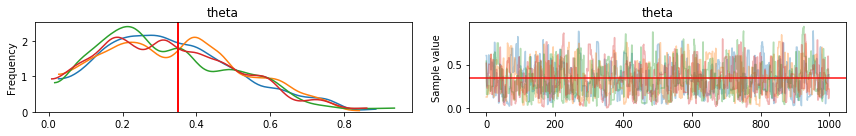

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm

np.random.seed(123)
n_experiment = 4
#预设真实参数
theta_real = 0.35 
#设置数据
data = stats.bernoulli.rvs(p=theta_real, size=n_experiment)
print(data)
data=np.array([1,0,0,0])

'''模型的描述'''
#构建模型容器
with pm.Model() as first_model: 
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
   
    '''推断'''
    #尝试返回最大后验
    start = pm.find_MAP()
    #定义采样方法
    step = pm.Metropolis()
    print(1)
    #进行推断          采样次数  采样方法  初始点
    trace = pm.sample(1000, step=step, start=start, cores=1)
'''收敛性测试
burnin = 10
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta':theta_real})
'''

with first_model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step,njobs=4, cores=1)#njobs=4

burnin = 0
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real})

In [6]:
pm.gelman_rubin(multi_chain)

{'theta': 1.0009568291524065}

GridSpec(1, 2, width_ratios=[3, 1])

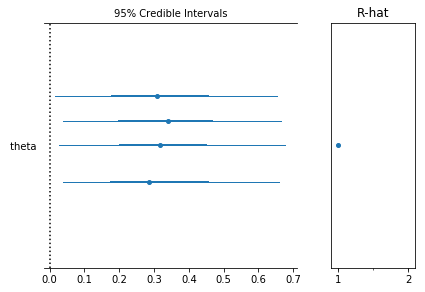

In [7]:
pm.forestplot(multi_chain, varnames=['theta'])

In [8]:
pm.summary(multi_chain)#

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.332301,0.180501,0.006423,0.02667,0.660862,810.502104,1.000957


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225E4CD7C88>,
      dtype=object)

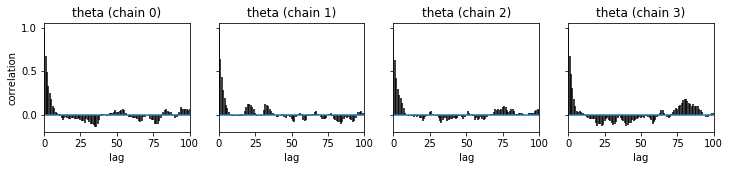

In [11]:
pm.autocorrplot(multi_chain)#自相关

In [12]:
pm.effective_n(multi_chain)['theta']#有效采样大小

810.5021042471378